In [4]:
import matplotlib.pyplot as plt
import pulp
import math
import random
import numpy as np
from queue import PriorityQueue

# 1. Utilities (Copied from Moodle/First File for the Project Work)

# 1.1. Points and Distances

In [5]:
def dist(p1, p2):
    (x1, y1) = p1
    (x2, y2) = p2
    return int(math.sqrt((x1-x2)**2+(y1-y2)**2))

# 1.2. Plot Map

In [6]:
def plotMap(G, T=[], P=[], W=None,
            style='r-o', lw=1, ms=3, 
            styleT='go', msT=5,
            styleP='b-o', lwP=3, msP=1,
            stylePT='go', msPT=7,
            styleW='bo', msW=7,
            text=None, grid=False):
    fig = plt.gcf()
    fig.set_size_inches(6, 6)
    V, E = G

    if not grid:
        plt.axis('off')
    plt.plot( [ p[0] for p in V ], [ p[1] for p in V ], 'ro', lw=lw, ms=ms)
    for (p, q) in E:
        plt.plot( [ p[0], q[0] ], [ p[1], q[1] ], 'r-o', lw=lw, ms=ms)
    for t in T:
        plt.plot( [ t[0] ], [ t[1] ], 
                  styleT, ms=msT)
    plt.plot( [ p[0] for p in P ],
              [ p[1] for p in P ], 
              styleP, lw=lwP, ms=msP)
    for p in P:
        if p in T:
            plt.plot( [ p[0] ], [ p[1] ], 
                      stylePT, ms=msPT)
    if W is not None:
        plt.plot( [ W[0] ], [ W[1] ], 
                      styleW, ms=msW)
    if text is not None:
        maxX = max([p[0] for p in V])
        plt.text(0.8*maxX, 0, text)
    if grid:
        plt.grid()
    plt.show()

# 1.3. Add Targets

In [7]:
def addTargets(M, T):
    V, E = M
    E = E.copy()
    V = V.copy()
    for t in T:
        minD = math.inf
        minE = None
        for e in E:
            P, Q = e
            distT = dist(P, t)+dist(t, Q)-dist(P, Q)
            if distT < minD:
                minD = distT
                minE = e
        P, Q = minE
        E.remove( (P, Q) )
        E.append( (P, t) )
        E.append( (t, Q) )
        V.append(t)
    return V, E

# 1.4. Generate Warehouse Location 
This is a random generation. This function selects a warehouse location based on the last 4 digit of my student number provided. This ensures reproducibility across different simulations of the selected process

In [8]:
def generateWarehouseLocation(M):
    V, _ = M
    W = random.sample(V, k=1)[0]
    return W

# 2. Load Pickled Sample Data

In [9]:
import pickle
with open('data.pickled', 'rb') as f:
    M, C = pickle.load(f)

In [10]:
random.seed(5640)
W = generateWarehouseLocation(M)

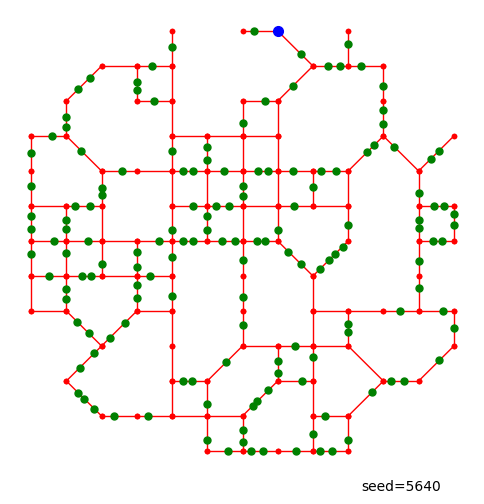

In [11]:
plotMap(M, T=C, P=[], W=W, text="seed=5640")

# 3. Finding the Shortest Path

# 3.1. The Algorithm
I make use of the *A algorithm in Week 3 in Moodle 

In [12]:
def pathLength(P):
    return 0 if len(P)<=1 else \
            dist(P[0], P[1])+pathLength(P[1:])

In [13]:
def shortestPath(M, A, B):

    def h(p): 
        return pathLength(p)+dist(p[-1],B)
    
    # candidates C are pairs of the path so far and 
    # the heuristic function of that path, 
    # sorted by the heuristic function, as maintained by
    # insert function
    def insert(C, p):
        hp = h(p)
        c = (p, hp)
        for i in range(len(C)):
            if C[i][1]>hp:
                return C[:i]+[c]+C[i:]
        return C+[c]   
        
    V, E = M
    assert(A in V and B in V)    
    C = insert([], [A])

    while len(C)>0:
        # take the first candidate out of the list of candidates
        path, _ = C[0]
        C = C[1:]
        if path[-1]==B:
            return path
        else:
            for (x, y) in E:
                if path[-1]==x and y not in path:
                    C = insert(C, path+[y])
                elif path[-1]==y and x not in path:
                    C = insert(C, path+[x])
    return None

# 3.2. Testing 

In [14]:
A = C[0] 
B = C[-1]

In [15]:
MAB = addTargets(M, [A, B])

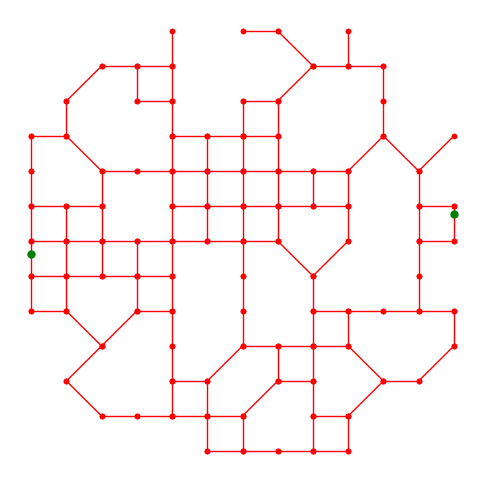

In [16]:
plotMap(MAB, T=[A, B])

In [17]:
P = shortestPath(MAB, A, B)

In [18]:
P


[(640, 3785),
 (640, 4000),
 (1200, 4000),
 (1760, 4000),
 (2320, 4000),
 (2880, 4000),
 (3440, 4000),
 (4000, 4000),
 (4560, 4000),
 (4560, 4560),
 (5120, 4560),
 (5680, 4560),
 (5680, 5120),
 (6240, 5680),
 (6800, 5120),
 (6800, 4560),
 (7360, 4560),
 (7360, 4428)]

In [19]:
pathLength(P)

9209

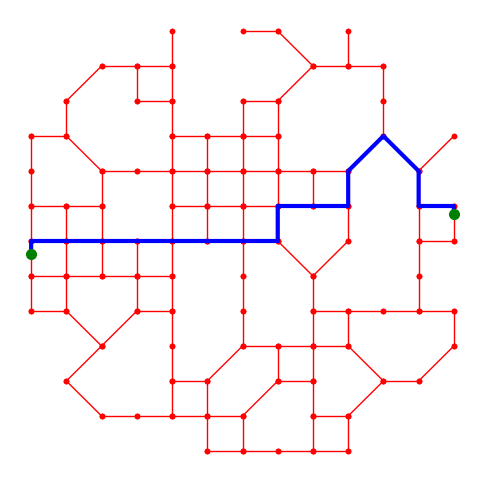

In [20]:
plotMap(MAB, T=[A, B], P=P)

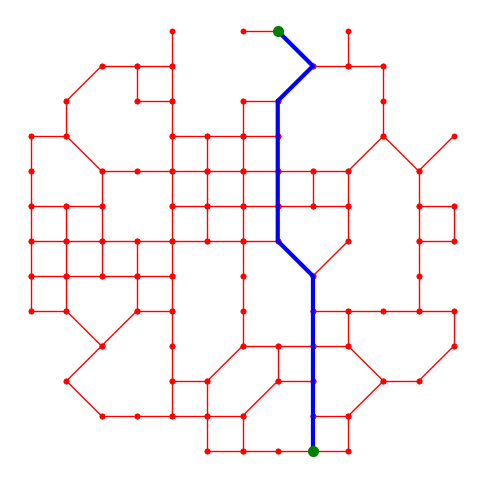

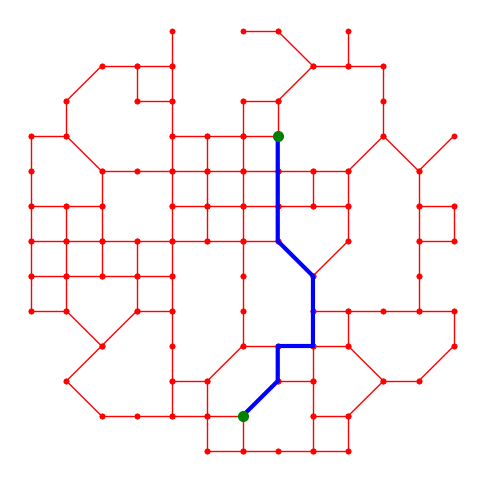

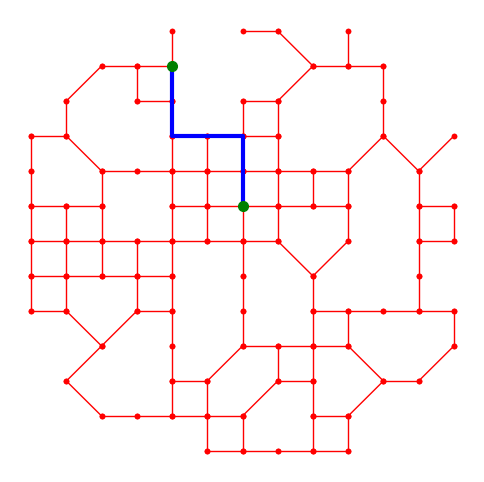

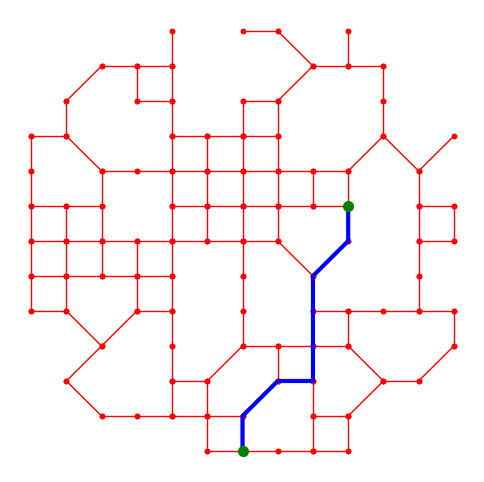

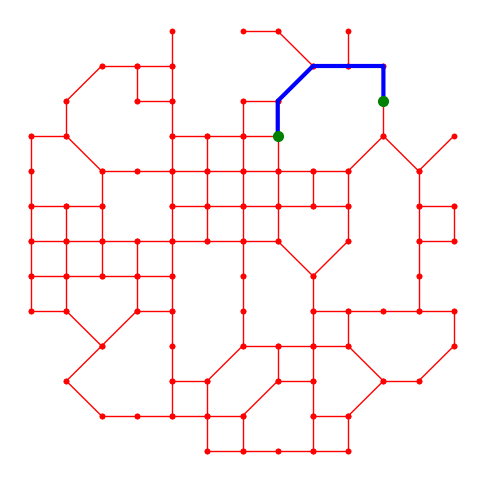

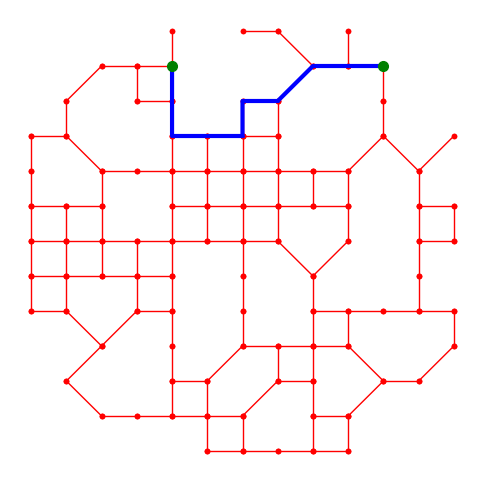

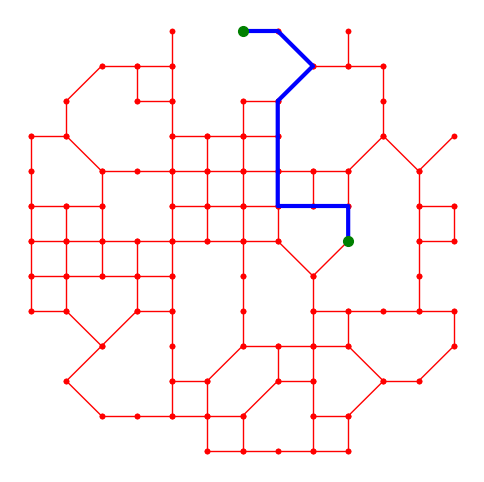

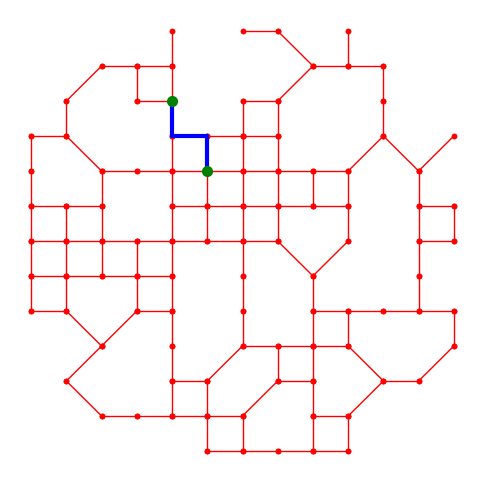

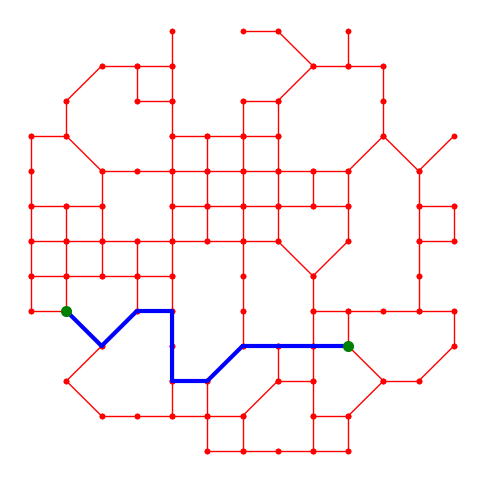

In [21]:
random.seed(5640)
V, E = M
for i in range(9):
    [A, B] = random.sample(V, k=2)
    MAB = addTargets(M, [A, B])
    P = shortestPath(MAB, A, B)
    plotMap(MAB, T=[A, B], P=P)